In [17]:
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.manifold import TSNE
from sklearn.metrics import classification_report
import scikitplot as skplt
import matplotlib.pyplot as plt
from simpletransformers.language_representation import RepresentationModel


# Carregando base de dados  pré-processada

In [2]:
database = pd.read_csv("../../Database/dataBaseWithNER.csv")

database = database.drop(columns=["Unnamed: 0"])
database = database.dropna()
target = database["target"].values.tolist()
database

,email,target
0,start date hourahead timee cardinall hou...,0
1,service long desk price structure deal quote ...,0
2,start date cardinall hourahead timee card...,0
3,start date hourahead timee cardinall anc...,0
4,cardinall deliverable revenue management marke...,0
...,...,...
33340,bio matrix scientific group symbo bmxg p...,1
33341,cardinall step away hot naked webcam girl liv...,1
33342,need pill increase performance click seroius ...,1
33343,datee final nom inlet hpl eastrans car...,0


In [3]:
emailsText = []
for email in database["email"]:
    emailsText.append(email)

In [4]:
print(len(emailsText))

33341


# Representação vetorial GPT2

In [5]:
model=RepresentationModel(
    model_type="gpt2",
    model_name="gpt2",
    use_cuda=True,
    #fp16=True
)

vectorialRepresentation = model.encode_sentences(emailsText, combine_strategy="mean")
vectorialRepresentation.shape

Some weights of the model checkpoint at gpt2 were not used when initializing GPT2ForTextRepresentation: ['h.9.mlp.c_proj.weight', 'h.6.mlp.c_fc.weight', 'h.0.attn.c_attn.weight', 'h.4.ln_1.weight', 'h.8.mlp.c_proj.bias', 'h.9.attn.c_attn.bias', 'h.6.attn.c_proj.weight', 'h.10.mlp.c_fc.bias', 'h.7.ln_1.bias', 'h.7.mlp.c_proj.weight', 'h.5.attn.c_proj.weight', 'h.7.ln_1.weight', 'h.3.attn.c_attn.bias', 'h.1.mlp.c_proj.weight', 'h.2.mlp.c_fc.bias', 'h.9.ln_1.bias', 'h.2.ln_1.bias', 'wpe.weight', 'h.3.mlp.c_fc.bias', 'h.4.mlp.c_fc.weight', 'h.10.mlp.c_proj.weight', 'h.10.attn.c_proj.bias', 'h.10.attn.bias', 'h.1.ln_2.weight', 'h.7.attn.c_proj.weight', 'h.2.mlp.c_fc.weight', 'h.6.attn.c_proj.bias', 'h.1.attn.c_attn.bias', 'h.1.ln_1.bias', 'h.0.attn.c_attn.bias', 'h.1.mlp.c_fc.bias', 'h.0.mlp.c_fc.bias', 'h.1.attn.c_attn.weight', 'h.2.attn.bias', 'ln_f.weight', 'h.9.mlp.c_proj.bias', 'h.7.attn.c_attn.bias', 'h.7.mlp.c_fc.weight', 'h.7.mlp.c_fc.bias', 'h.3.ln_2.bias', 'h.6.attn.c_attn.bias', 

(33341, 768)

In [6]:
gpt2Dataframe = pd.DataFrame(vectorialRepresentation)
gpt2Dataframe

,0,1,2,3,4,5,6,7,8,9,...,758,759,760,761,762,763,764,765,766,767
0,-0.397625,-1.083719,-1.889417,-0.292610,1.774930,-0.764047,0.798261,2.218202,-1.085185,-0.196452,...,-0.704116,0.047525,0.915839,-0.524774,0.910281,1.349577,-0.883586,0.163145,0.625139,0.003384
1,0.818216,-1.437072,-0.973405,0.011228,2.817455,-0.719763,-0.499551,0.789617,-1.280326,0.530723,...,0.699059,0.770773,-0.696899,0.559768,0.410770,0.476668,0.786625,-0.407283,0.121173,0.558065
2,-0.143072,-0.908672,-1.296775,0.066643,2.283197,-0.375665,0.282034,1.387876,-1.090591,-0.224934,...,-0.591289,0.166411,0.426350,-0.201173,0.835536,0.976172,-0.277665,0.350200,0.231636,-0.071385
3,-0.276648,-1.086580,-1.489241,-0.092190,1.776576,-0.707113,0.338181,1.659503,-1.212021,-0.222451,...,-0.409304,0.220759,0.434961,-0.283765,0.687924,1.030854,-0.274998,0.237702,0.144312,0.104457
4,-0.571274,-0.627774,0.962667,-0.511915,1.697630,-0.323768,-0.610472,-0.083099,-0.664098,0.267651,...,-0.457068,0.566648,0.751385,-0.593250,0.439791,-0.230630,1.205879,-0.196662,-0.896971,0.443820
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33336,-0.247319,-0.202255,-1.467946,-0.284262,1.486154,0.239148,-0.753588,1.127324,-1.877439,-0.303002,...,-0.321081,0.252441,-0.004446,0.306962,0.228940,1.284970,0.303134,1.074510,0.016634,0.360766
33337,-0.192474,-0.958504,-0.319695,-0.392413,2.539647,0.437710,0.038079,0.456635,-1.160619,0.402353,...,-0.489840,0.210484,0.829286,0.181974,1.274482,0.536807,-0.545967,-0.317020,-0.012539,-0.565553
33338,-0.492450,-1.144823,-1.366165,-0.222596,1.062512,-0.602002,-0.316097,0.985071,-0.898040,0.673940,...,0.133835,0.609297,-0.214884,0.847856,0.833347,0.556635,-0.115957,0.413256,-0.021021,0.399411
33339,0.224846,-0.904264,-0.840356,-0.332988,1.709903,0.014841,-0.508155,1.374448,-1.523857,-0.325184,...,-0.652910,-0.080578,0.005434,0.203759,1.234858,0.042488,0.324373,0.511807,-0.685305,0.632299


# Visualização de dados com TSNE

               0          1  Target
0     -59.626762 -46.397293       0
1     -14.737188 -34.617622       0
2      46.696259   9.561372       0
3      73.081680 -10.244417       0
4      -4.475343  53.896320       0
...          ...        ...     ...
33336   9.725403  13.364982       1
33337   1.431885  32.345341       1
33338   8.692756 -19.497305       1
33339  12.641131 -22.820452       0
33340   2.919549  25.400606       1

[33341 rows x 3 columns]


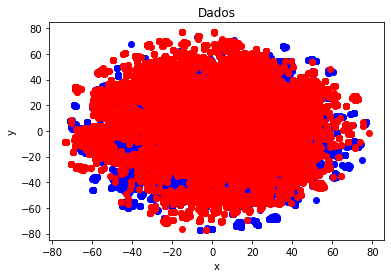

In [7]:
model = TSNE(n_components=2, random_state=0)
array_red = model.fit_transform(gpt2Dataframe)

df_tsne = pd.DataFrame(array_red)

df_tsne['Target'] = target
print(df_tsne)
df_tsne_c1 = df_tsne[df_tsne['Target'] == 0]

df_tsne_c2 = df_tsne[df_tsne['Target'] == 1]

plt.scatter(df_tsne_c1[0].array,df_tsne_c1[1].array,marker='o',color='blue')

plt.scatter(df_tsne_c2[0].array,df_tsne_c2[1].array,marker='o',color='red')

plt.title('Dados')
plt.xlabel('x')
plt.ylabel('y')

plt.show()

# Validação

In [18]:
def getModel():

    return GaussianNB()

In [19]:


X_treino, X_teste, y_treino, y_teste = train_test_split(gpt2Dataframe.values,target,test_size=0.2)
modelo = getModel().fit(X_treino,y_treino)
score = modelo.score(X_teste,y_teste)
score

0.6768630979157295

In [20]:
scores = cross_val_score(getModel(),gpt2Dataframe.values,target,cv=10)

scores.mean()

0.6777846259833491

In [21]:
predicoes = cross_val_predict(getModel(), gpt2Dataframe.values, target, cv=10)

In [22]:
print("\nClassification Report : ")
print(classification_report(target, predicoes, target_names=["Ham", "Spam"]))


Classification Report : 
              precision    recall  f1-score   support

         Ham       0.67      0.70      0.68     16493
        Spam       0.69      0.66      0.67     16848

    accuracy                           0.68     33341
   macro avg       0.68      0.68      0.68     33341
weighted avg       0.68      0.68      0.68     33341



(array([0, 1]), [Text(0, 0, 'Ham'), Text(1, 0, 'Spam')])

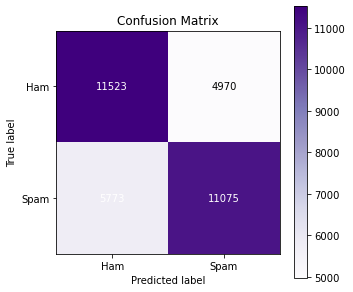

In [23]:
categories = ["Ham", "Spam"]

skplt.metrics.plot_confusion_matrix(
    [categories[i] for i in target], [categories[i] for i in predicoes.tolist()],
    title="Confusion Matrix",
    cmap="Purples",
    hide_zeros=True,
    figsize=(5,5)
)

plt.xticks()

(array([0, 1]), [Text(0, 0, 'Ham'), Text(1, 0, 'Spam')])

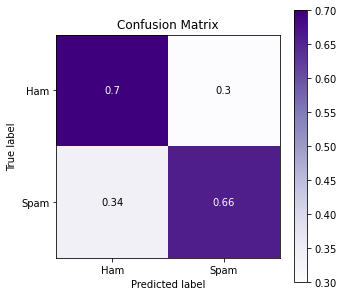

In [24]:
skplt.metrics.plot_confusion_matrix(
    [categories[i] for i in target], [categories[i] for i in predicoes.tolist()],
    normalize=True,
    title="Confusion Matrix",
    cmap="Purples",
    hide_zeros=True,
    figsize=(5,5)
)

plt.xticks()